## 1- Đạo hàm tổng quát :

Tính dy/dx =  

### 1a:

![Sca2sca.png](https://upanh.vn-z.vn/images/2021/09/05/Sca2sca.md.png)

<img src="https://i.imgur.com/ZAEPZWM.jpg" alt="" width="350"/>

### 1b:
![Vect2sca.png](https://upanh.vn-z.vn/images/2021/09/05/Vect2sca.md.png)

<img src="https://i.imgur.com/yfjgsna.jpg" alt="" width="350"/>

### 1c:
[![Vect2sca.md.png](https://upanh.vn-z.vn/images/2021/09/05/Vect2sca.md.png)](https://upanh.vn-z.vn/image/D5t)

[![v2v2.md.png](https://upanh.vn-z.vn/images/2021/09/05/v2v2.md.png)](https://upanh.vn-z.vn/image/D5q)


<img src="https://i.imgur.com/zj1ohFs.jpg" alt="" width="350"/>

---

##  2 - Ứng dụng đạo hàm - sử dụng 2 cách (chỉ tìm 1 nghiệm) để tìm nghiệm của phương trình: 
- Cách 1: Đạo hàm thủ công
- Cách 2: Đạo hàm tự động (Numberical Differentiation)

### 2a:

<img src="https://i.imgur.com/jJoVatL.jpg" alt="" width="350"/>


In [1]:
#Đạo hàm thủ công
def func(x):
    return x**4 - 4*x**3 -117*x**2 - 96*x +576
def df_(x):
    return 4*x**3 - 12*x**2 - 234*x -96
def newton_manual(x,df):
    return x - func(x)/df(x)
x_0 = -5 #initial
while(1):
    x = newton_manual(x_0,df_)
    print(x)
    if abs(x - x_0) < 1.0e-4:
        break
    x_0 = x
print('1 nghiem x=', x) 

-2.2846715328467155
-3.0753734482351933
-3.0003544775016255
-3.000000008695062
-2.9999999999999996
1 nghiem x= -2.9999999999999996


In [2]:
#Numberical Differentiation


# đạo hàm trung tâm
def grad(func, x, e=1.0e-4):     
    return (func(x + e/2) - func(x - e/2)) / e
def newton_method(x,grad):
    return x - func(x)/grad(func,x)

x_0 = -5
while(1):
    x = newton_method(x_0,grad)
    print(x)
    if abs(x - x_0) < 1.0e-4:
        break
    x_0 = x
print('1 nghiem x =', x)    

-2.2846715322327102
-3.075373448487952
-3.000354477495851
-3.0000000086950243
-3.0
1 nghiem x = -3.0


### 2b:

<img src="https://i.imgur.com/ggsK2Zj.jpg" alt="" width="350"/>


> Cách chứng minh và tìm nghiệm theo phương pháp lặp Newton Raphson: 
https://colab.research.google.com/drive/1R7nshsTvCFS4fndbXZrXkOFO9UwIsJJt

---

In [3]:
#Đạo hàm thủ công
def func(x):
    return x**4 - 8*x**3 +21*x**2 - 24*x + 9
def df(x):
    return 4*x**3 - 24*x**2 + 42*x -24
x_0 = 0
while(1):
    x = newton_manual(x_0,df)
    print(x)
    if abs(x - x_0) < 1.0e-4:
        break
    x_0 = x
    
print('1 nghiem x=', x) 

0.375
0.5984984599589322
0.6850576912296117
0.6970164471426971
0.6972243005235828
0.6972243622679996
1 nghiem x= 0.6972243622679996


In [4]:
#Numberical Differentiation

# đạo hàm trung tâm
def grad(func, x, e=1.0e-4):     
    return (func(x + e/2) - func(x - e/2)) / e
x_0 = 4
while(1):
    x = newton_method(x_0,grad)
    print(x)
    if abs(x - x_0) < 1.0e-4:
        break
    x_0 = x
print('1 nghiem x=', x)    

4.43749999945701
4.317254624534651
4.302966964397107
4.302775671721486
4.302775637731995
1 nghiem x= 4.302775637731995


## 3 - Ứng dụng đạo hàm - sử dụng 2 cách để tìm cực tiểu:
- Cách 1: Đạo hàm thủ công
- Cách 2: Đạo hàm tự động (Numberical Differentiation)

### 3a
$z=2x^4+y^4-4x^2+2y^2$

In [5]:
#thủ công
import numpy as np
def func(x,y):
    return 2*x**4 + y**4 -4*x**2 + 2*y**2
def grad_func(x,y):
    return np.array([8*x**3 - 8*x ,4*y**3 + 4*y]).reshape(-1,1)

#Hesse_matrix
def H(x,y):
    return np.array([
        [24*x**2 - 8, 0],
        [0 , 12*y**2 + 4]
    ])
def newton_high_dimension(x_0 ,y_0):
    p_0 = np.array([x_0,y_0]).reshape(-1,1)
    for _ in range(30):
        p = p_0 - np.linalg.inv(H(p_0[0,0], p_0[0,0]))@grad_func(p_0[0,0], p_0[1,0])
        p_0 = p
    return p

print(newton_high_dimension(1,1))
print()
print(newton_high_dimension(-1,-1))
#print(H(1,1))
#print(grad_func(1,1))

[[1.00000000e+00]
 [1.00169971e-04]]

[[-1.00000000e+00]
 [-1.00169971e-04]]
[[16  0]
 [ 0 16]]
[[0]
 [8]]


In [23]:
#Tự động
def grad(func, x, y, e=1.0e-4):
    df_x = (func(x + e/2,y) - func(x - e/2,y)) / e
    df_y = (func(x,y + e/2) - func(x,y - e/2)) / e
    return np.array([df_x, df_y]).reshape(-1,1)
#đạo hàm trung tâm cấp 2
def grad2(func, x, y, e=1.0e-4):
    d2f_x = (func(x + e,y) + func(x - e,y) -2*func(x,y)) / e**2
    d2f_y = (func(x,y + e) + func(x,y - e) -2*func(x,y)) / e**2
    return d2f_x, d2f_y
def H(x,y):
    d2f_x, d2f_y = grad2(func, x,y)
    return np.array([
        [d2f_x, 0],
        [0 , d2f_y]
    ])

def newton_high_dimension(x_0 ,y_0):
    p_0 = np.array([x_0,y_0]).reshape(-1,1)
    for _ in range(30):
        p = p_0 - np.linalg.inv(H(p_0[0,0], p_0[0,0]))@grad(func, p_0[0,0], p_0[1,0])
        p_0 = p
        #print(p)
    return p
print('ham dat cuc tieu tai: ',newton_high_dimension(1,1))
print()
print('ham dat cuc tieu tai: ',newton_high_dimension(-1,-1))


dat cuc tieu la:  [[9.04181464e-15]
 [1.40402819e-15]]

dat cuc tieu la:  [[-9.04181464e-15]
 [-1.40402819e-15]]


### 3b

$z = 2x^2+3y^2-e^{-(x^2+y^2)}$

In [24]:
import math
def func(x, y):
    return 2*x**2 + 3*y**2 - math.exp(-(x**2+y**2))

#Tự động
def grad(func, x, y, e=1.0e-4):
    df_x = (func(x + e/2,y) - func(x - e/2,y)) / e
    df_y = (func(x,y + e/2) - func(x,y - e/2)) / e
    return np.array([df_x, df_y]).reshape(-1,1)
#đạo hàm trung tâm cấp 2
def grad2(func, x, y, e=1.0e-4):
    d2f_x = (func(x + e,y) + func(x - e,y) -2*func(x,y)) / e**2
    d2f_y = (func(x,y + e) + func(x,y - e) -2*func(x,y)) / e**2
    return d2f_x, d2f_y
def H(x,y):
    d2f_x, d2f_y = grad2(func, x,y)
    return np.array([
        [d2f_x, 0],
        [0 , d2f_y]
    ])

def newton_high_dimension(x_0 ,y_0):
    p_0 = np.array([x_0,y_0]).reshape(-1,1)
    for _ in range(30):
        p = p_0 - np.linalg.inv(H(p_0[0,0], p_0[0,0]))@grad(func, p_0[0,0], p_0[1,0])
        p_0 = p
        #print(p)
    return p
print('ham dat cuc tieu tai: ',newton_high_dimension(1,1))
print()
print('ham dat cuc tieu tai: ',newton_high_dimension(-1,-1))

ham dat cuc tieu tai:  [[9.04181464e-15]
 [1.40402819e-15]]

ham dat cuc tieu tai:  [[-9.04181464e-15]
 [-1.40402819e-15]]


---

## 4 - Ứng dụng đạo hàm - sử dụng 2 cách để giải bài toán Linear Regression:
- Cách 1: Đạo hàm thủ công
- Cách 2: Đạo hàm tự động (Numberical Differentiation)

> data (advertising.csv): https://drive.google.com/file/d/1joUbtLNSTmXc_fyuW2f9Af1Y0RPNSB6I/view?usp=sharing

> data (BostonHousing.csv): https://drive.google.com/file/d/18Nh-Vh1QJmFA0DWeEYr163svN6ABm-TN/view?usp=sharing

---

## data (advertising.csv)

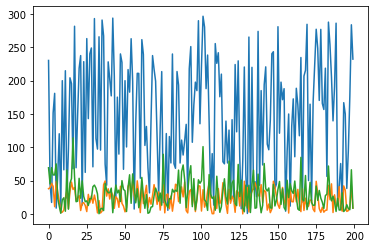

In [8]:
#Đạo hàm tự động

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Data preparation

data = genfromtxt('advertising.csv', delimiter=',' , skip_header=1)
x = data[:,:-1] # feature
y = data[:,-1:] #label

plt.plot(x)

n_sample ,n_features = x.shape



(200, 3)
(200, 4)


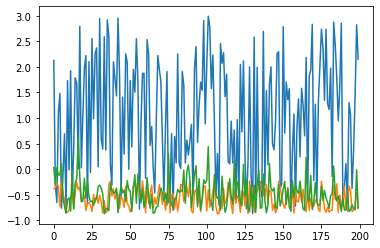

In [9]:
#nomalize - chuẩn hóa dữ liệu
x = (x - x.mean())/x.std()
print(x.shape)
plt.plot(x)
x = np.concatenate((x, np.ones((n_sample,1))) , axis = 1) #add them cot 1 vao x
print(x.shape)

In [10]:
def linear(x): # x*w
    def handle(w):
        return x@w
    return handle
def mean_square_error(const): 
    def handle(w):
        return np.mean((const-w)**2, keepdims=True)
    return handle

In [11]:
#init params
w = np.random.rand(n_features +1, 1)
learning_rate = 0.01
batch_size = n_sample
n_epochs = 100

#for debug
losses = []
print(w)
#print(n_features+1)

[[0.83480269]
 [0.22347291]
 [0.39537906]
 [0.04761852]]


In [12]:
#Đạo hàm tổng quát
def d_vec_to_vec(f, w, epsilon=1.0e-7):
    result=[]
    w = np.array(w, dtype=np.float64).reshape(-1,1)
    for i in range(w.shape[0]):
        w_t = w.copy()
        w_p = w.copy()
        w_t[i] += epsilon/2
        w_p[i] -= epsilon/2
        result.append((f(w_t) - f(w_p))/epsilon)
    return np.concatenate(result,-1)

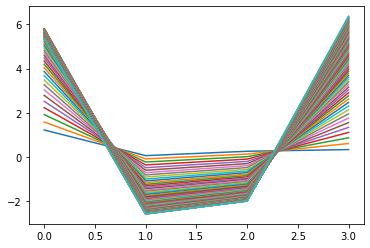

In [13]:
#tìm w,b
for epoch in range(n_epochs):
    
    for i in range(0, n_sample, batch_size):
        
        #pick sample
        xi = x[i:batch_size, :]
        yi = y[i:batch_size, :]
        
        #predict
        y_pred = linear(x)(w)
        
        #loss (debug)
        l = mean_square_error(yi)(y_pred)
        losses.append(l.mean()) 
        
        # compute gradient ( d_weight)
        dl_dy = d_vec_to_vec(mean_square_error(yi), y_pred)
        dy_dw = d_vec_to_vec(linear(x), w)
        # dL/dw = dL/dy*dy/dw
        d_lw = (dl_dy @ dy_dw).T
        
        #update weight
        w = w - learning_rate*d_lw
        plt.plot(w)

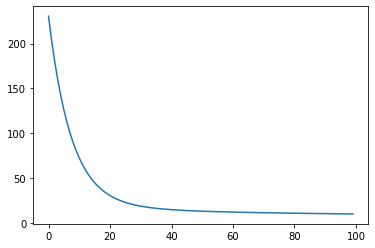

In [14]:
plt.plot(losses)

[[ 5.33834212]
 [-2.56967155]
 [-1.98676982]
 [ 6.36363512]]



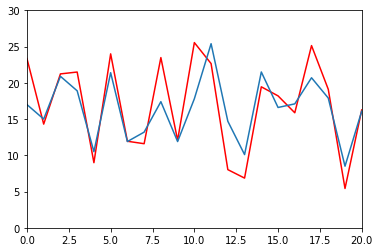

In [15]:
#test
print(w)
print()
plt.plot(y_pred[25:50],'r')
#plt.plot(y[0:5])
plt.plot(y[25:50])
plt.xlim(0,20)
plt.ylim(0,30)
plt.show()

In [46]:
# Đạo hàm thủ công

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Data preparation
N=200
data = genfromtxt('advertising.csv', delimiter=',' , skip_header=1)
x = data[:,:-1] # feature
y = data[:,-1:] #label
print(x.shape)

i=0
x_1_0 = x[i,0]
print(x_1_0)

(200, 3)
230.1


In [63]:
def func(w, x, y):
    # params
    error_sum = 0.0
    # sample
    x = np.array(x, dtype=np.float64)
    #print(x.shape)
    for i in range(N):
        x1_i ,x2_i , x3_i = x[i,:]
        y_i = y[i]
        w1, w2 ,w3 ,w4 = w
        # compute predicted_price
        predicted_price = w1*x1_i + w2*x2_i +w3*x3_i + w4
        
        # compute error for the ith sample
        error_i = (predicted_price - y_i)**2
        error_sum = error_sum + error_i
    
    return error_sum

w1 = 0.02 
w2 = -0.01
w3 =0.34
w4 = 0.5
w = np.array([w1,w2,w3,w4])
#print(x.shape)
error_value = func(w, x, y)
print(error_value)

[12050.155362]


In [64]:
# đạo hàm trung tâm
def gradient(f, w, x, y, e=1.0e-4):
    dw = []
    for i in range(len(w)): # shape=4
        w_t = w.copy()
        w_p = w.copy()
        w_t[i] += e/2
        w_p[i] -= e/2
        dw.append((f(w_t,x ,y) - f(w_p,x ,y))/e)
    return np.concatenate(dw,-1)
gradient(func, w, x, y)

array([-180206.99359997,  -10018.02400004,   38589.14340008,
          -613.57199997])

In [70]:
import random
# 1. set w randomly
w1 = random.random()
w2 = random.random()
w3 = random.random()
w4 = 0.0
w = np.array([w1,w2,w3,w4])
# params
num_iterations = 200
step = 0.01

# optimize
for _ in range(num_iterations):
    # 2. compute the derivative at w
    dw = gradient(func, w, x ,y)
    
    # get sign of dx
    sign_w1 = np.sign(dw[0])
    sign_w2 = np.sign(dw[1])
    sign_w3 = np.sign(dw[2])
    sign_w4 = np.sign(dw[3])
    #sign_dw = np.array([np.sign(dw[0]),np.sign(dw[1]),np.sign(dw[2]),np.sign(dw[3])])    
    # update
    w[0] = dw[0] - sign_w1*step
    w[1] = dw[1] - sign_w1*step
    w[2] = dw[2] - sign_w1*step
    w[3] = dw[3] - sign_w1*step
    # test
    error = func(w, x, y)    
    print(error, w)

[3.79578259e+20] [7765951.11686511  986253.59811129 1299272.59101773   40143.16838941]
[5.5167308e+34] [9.37158246e+13 1.15743130e+13 1.53373901e+13 4.84966400e+11]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [

[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.03578833e+18] [-1052644.16999999  -151714.78999968  -192153.51000007    -6052.1899999 ]
[1.0225554e+33] [-1.27575450e+13 -1.57925376e+12 -2.09419264e+12 -6.56691200e+10]
[51342.39] [0. 0. 0. 0.]
[7.0357883

## data (BostonHousing.csv)

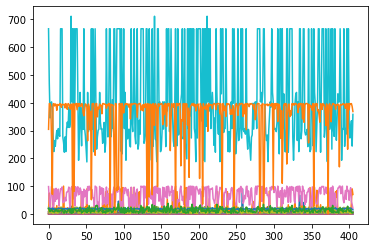

In [17]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Data preparation

data = genfromtxt('BostonHousing.csv', delimiter=',' , skip_header=1)
x = data[:,:-1] # feature
y = data[:,-1:] #label

plt.plot(x)

n_sample ,n_features = x.shape

(406, 13)
(406, 14)


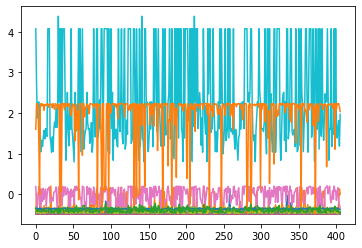

In [18]:
#nomalize - chuẩn hóa dữ liệu
x = (x - x.mean())/x.std()
print(x.shape)
plt.plot(x)
x = np.concatenate((x, np.ones((n_sample,1))) , axis = 1) #add them cot 1 vao x
print(x.shape)

In [19]:
#init params
w = np.random.rand(n_features +1, 1)
learning_rate = 0.01
batch_size = n_sample
n_epochs = 100

#for debug
losses = []

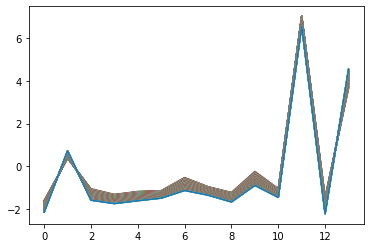

In [20]:
#tìm w,b
for epoch in range(n_epochs):
    
    for i in range(0, n_sample, batch_size):
        
        #pick sample
        xi = x[i:batch_size, :]
        yi = y[i:batch_size, :]
        
        #predict
        y_pred = linear(x)(w)
        
        #loss (debug)
        l = mean_square_error(yi)(y_pred)
        losses.append(l.mean()) 
        
        # compute gradient ( d_weight)
        dl_dy = d_vec_to_vec(mean_square_error(yi), y_pred)
        dy_dw = d_vec_to_vec(linear(x), w)
        # dL/dw = dL/dy*dy/dw
        d_lw = (dl_dy @ dy_dw).T
        
        #update weight
        w = w - learning_rate*d_lw
        #tìm w,b
for epoch in range(n_epochs):
    
    for i in range(0, n_sample, batch_size):
        
        #pick sample
        xi = x[i:batch_size, :]
        yi = y[i:batch_size, :]
        
        #predict
        y_pred = linear(x)(w)
        
        #loss (debug)
        l = mean_square_error(yi)(y_pred)
        losses.append(l.mean()) 
        
        # compute gradient ( d_weight)
        dl_dy = d_vec_to_vec(mean_square_error(yi), y_pred)
        dy_dw = d_vec_to_vec(linear(x), w)
        # dL/dw = dL/dy*dy/dw
        d_lw = (dl_dy @ dy_dw).T
        
        #update weight
        w = w - learning_rate*d_lw
        plt.plot(w)
plt.plot(w)

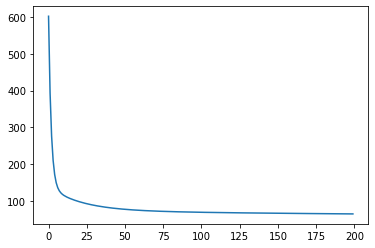

In [21]:
plt.plot(losses)

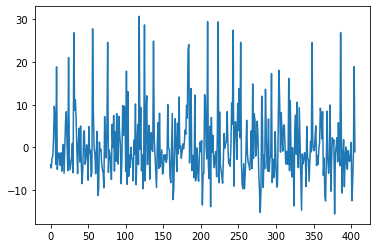

In [22]:
plt.plot(y-y_pred)